# 🏡 House Prices Prediction – Linear Regression

### 📋 Project Overview

This notebook presents a full end-to-end regression to predict house prices based on the **Ames Housing Dataset**. \

---

### ✅ Key Workflow Steps:
- 🔍 **Exploratory Data Analysis (EDA)** to understand the data structure and identify key drivers of price
- 🧹 **Data Preprocessing**:
  - Handling missing values
  - Outlier detection & removal
  - Log-transforming the target (`SalePrice`)
- 🧠 **Feature Engineering**:
  - Creating new features like `TotalBathrooms`, `HouseAge`, and `HasBasement`
- 📈 **Model Training**:
  - **LinearRegression (Normal Equation)** – used for final prediction
  - **SGDRegressor** with `StandardScaler` – used for iterative RMSE visualization and evaluation
- 📊 **Evaluation**:
  - RMSE on train/validation splits
  - RMSE plotted over epochs to analyze learning behavior





## 1. Import Libraries & Data Loading

In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection

import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Define plot settings

In [62]:
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import The Dataset

In [63]:
train_data_path = '/content/drive/MyDrive/Colab Notebooks/House price Prediction /train.csv'
test_data_path = '/content/drive/MyDrive/Colab Notebooks/House price Prediction /test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

## 2. Initial Data Review

In [64]:
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)


train_df shape: (1460, 81)
test_df shape: (1459, 80)


In [65]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3. Handling Missing Values

In [68]:
def show_missing_values(df, show_top=20, plot=False, return_df=False):

    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected a pandas DataFrame.")

    total_missing = df.isnull().sum()
    percent_missing = (total_missing / len(df)) * 100

    missing_df = pd.concat([total_missing, percent_missing], axis=1)
    missing_df.columns = ['Total Missing', 'Percent Missing']
    missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values('Total Missing', ascending=False)

    print("Missing Values (Top {}):\n".format(show_top))
    display(missing_df.head(show_top))

    if plot and not missing_df.empty:
        missing_df.head(show_top).sort_values("Percent Missing").plot(
            kind="barh", figsize=(10, 6), color="salmon", edgecolor="black"
        )
        plt.title("Top Missing Values")
        plt.xlabel("Percent Missing")
        plt.ylabel("Features")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    if return_df:
        return missing_df

def handle_missing_values(df, numeric_strategy='median', categorical_fill='None'):

    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected a pandas DataFrame")

    df_cleaned = df.copy()

    # Fill numeric features
    numeric_features = df_cleaned.select_dtypes(include=[np.number]).columns
    for feature in numeric_features:
        if numeric_strategy == 'median':
            fill_value = df_cleaned[feature].median()
        else:
            fill_value = numeric_strategy
        df_cleaned[feature] = df_cleaned[feature].fillna(fill_value)

    # Fill categorical features
    categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns
    for feature in categorical_features:
        df_cleaned[feature] = df_cleaned[feature].fillna(categorical_fill)

    print(f"Remaining missing values: {df_cleaned.isnull().sum().sum()}")
    return df_cleaned


In [69]:
print("Missing values in train_df:")
show_missing_values(train_df)
print("---------------------------------------------------------")
print("Missing values in test_df:")
print("---------------------------------------------------------")
show_missing_values(test_df)
train_dataset_no_missing = handle_missing_values(train_df)
test_data_no_missing = handle_missing_values(test_df)


Missing values in train_df:
Missing Values (Top 20):



,Total Missing,Percent Missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


---------------------------------------------------------
Missing values in test_df:
---------------------------------------------------------
Missing Values (Top 20):



,Total Missing,Percent Missing
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageQual,78,5.346127
GarageCond,78,5.346127
GarageYrBlt,78,5.346127


Remaining missing values: 0
Remaining missing values: 0


## 4. Target Variable Transformation

### Visualize the distribution of the target variable 'SalePrice'

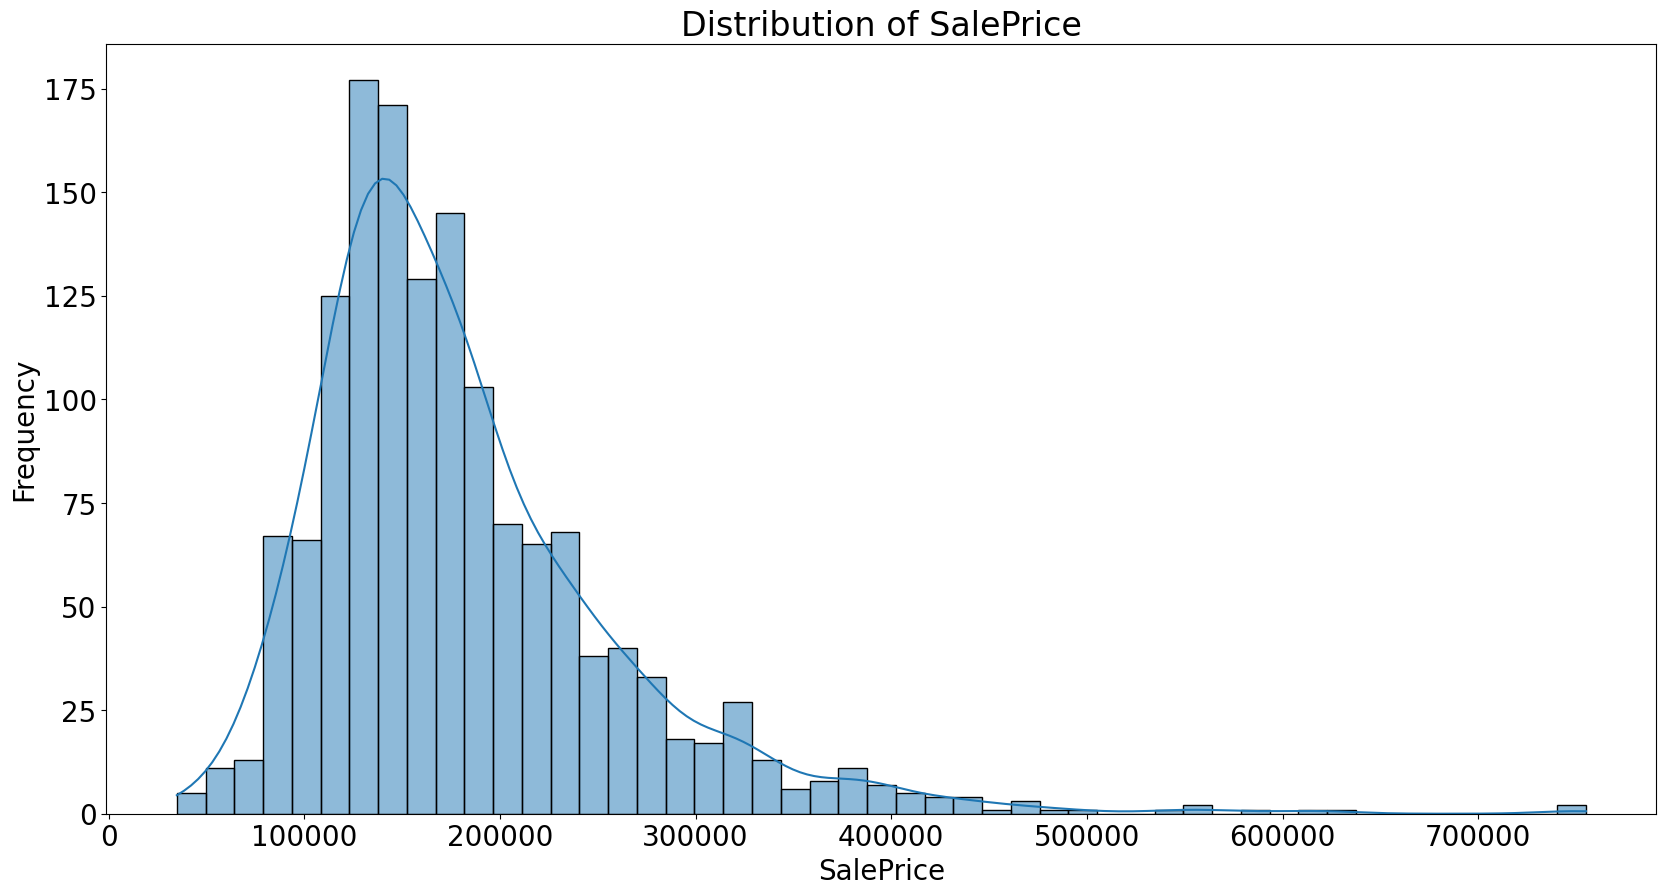

In [70]:
sns.histplot(train_dataset_no_missing['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Histogram Plot Diagnosis:

 - The distribution is right-skewed (a long tail to the right).

 - Most of the values are clustered around 100,000–200,000.

 - There’s no bell-shaped, symmetric curve — a key trait of normal distributions.

### Log Transformation of SalePrice

The `SalePrice` variable is not normally distributed — it is right-skewed, as seen in the histogram. Many machine learning models, especially linear regression, assume that the target variable follows a normal distribution.

To address this, we apply a **logarithmic transformation** to `SalePrice`. This helps to:

- Reduce skewness and bring the distribution closer to normal
- Compress large values and reduce the influence of outliers
- Improve the performance and assumptions of regression models

We use the natural logarithm of (SalePrice + 1) to ensure that zero values, if any, do not cause errors:


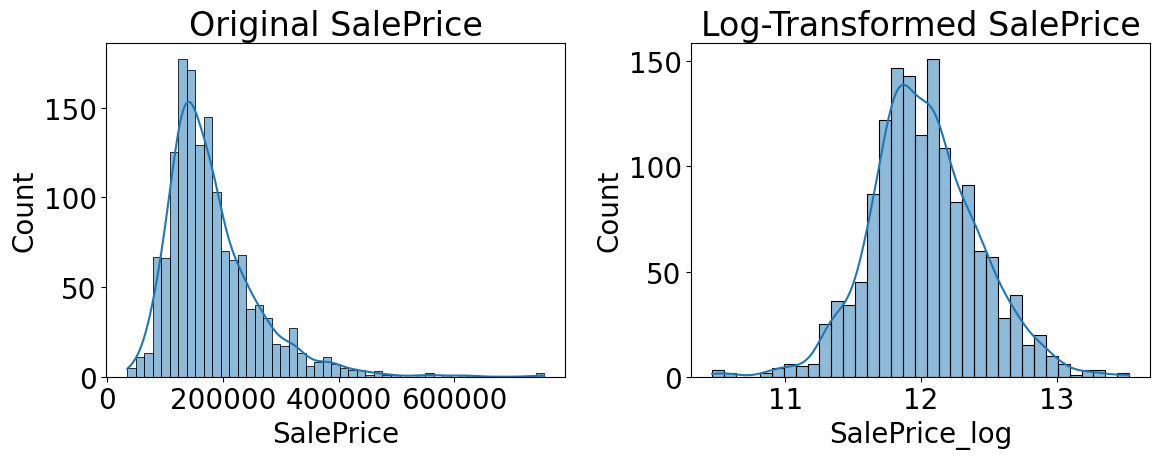

In [71]:
# Apply log(1 + x) to handle 0 values safely
train_dataset_no_missing['SalePrice_log'] = np.log1p(train_dataset_no_missing['SalePrice'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train_dataset_no_missing['SalePrice'], kde=True, ax=axs[0])
axs[0].set_title('Original SalePrice')

sns.histplot(train_dataset_no_missing['SalePrice_log'], kde=True, ax=axs[1])
axs[1].set_title('Log-Transformed SalePrice')

plt.tight_layout()
plt.show()

#### Effect of Log Transformation on SalePrice Distribution

The left plot shows the original distribution of the `SalePrice` variable, which is clearly **right-skewed**. This kind of skewness can negatively impact the performance of many machine learning models, especially those that assume a normal distribution of the target variable, such as linear regression.

To address this, we applied a **log transformation** using `log1p` (log of `SalePrice + 1`). The result is shown in the right plot.

As seen in the transformed distribution:
- The shape is now **more symmetric and bell-shaped**, closely resembling a normal distribution.
- Extreme high values (outliers) are **compressed**, reducing their influence.
- The transformation helps satisfy the assumptions of normality and homoscedasticity required by several statistical and ML models.

This transformation prepares the `SalePrice` variable for more reliable and accurate modeling in the next stages.

## 5. Feature Engineering

After completing the initial exploratory data analysis and cleaning steps, we now apply feature engineering to enhance the dataset.

Feature engineering helps capture domain-specific insights and improves model performance by:

- Creating more informative variables
- Consolidating redundant features
- Adding non-linear effects for linear models

Below are several new features that are meaningful in the context of housing prices:
- `TotalBathrooms`: Combines full and half bathrooms into a single metric.
- `HasBasement`: Indicates whether the house has a basement (binary).
- `HouseAge`: Age of the house since it was built.
- `Remodeled`: Binary indicator of whether the house has been remodeled.

In [72]:
# Create new engineered features

# Total number of bathrooms
train_dataset_no_missing['TotalBathrooms'] = (
    train_dataset_no_missing['FullBath'] + 0.5 * train_dataset_no_missing.get('HalfBath', 0)
)

test_data_no_missing['TotalBathrooms'] = (
    test_data_no_missing['FullBath'] + 0.5 * test_data_no_missing.get('HalfBath', 0)
)


# HasBasement: binary feature
train_dataset_no_missing['HasBasement'] = (train_dataset_no_missing['TotalBsmtSF'] > 0).astype(int)
test_data_no_missing['HasBasement'] = (test_data_no_missing['TotalBsmtSF'] > 0).astype(int)

# HouseAge: how old the house is at the time of sale
train_dataset_no_missing['HouseAge'] = train_dataset_no_missing['YrSold'] - train_dataset_no_missing['YearBuilt']
test_data_no_missing['HouseAge'] = test_data_no_missing['YrSold'] - test_data_no_missing['YearBuilt']

# Remodeled: 1 if the house was remodeled, 0 if not
train_dataset_no_missing['Remodeled'] = (train_dataset_no_missing['YearBuilt'] != train_dataset_no_missing['YearRemodAdd']).astype(int)
test_data_no_missing['Remodeled'] = (test_data_no_missing['YearBuilt'] != test_data_no_missing['YearRemodAdd']).astype(int)

# Check the new columns
train_dataset_no_missing[['TotalBathrooms', 'HasBasement', 'HouseAge', 'Remodeled']].head()


,TotalBathrooms,HasBasement,HouseAge,Remodeled
0,2.5,1,5,0
1,2.0,1,31,0
2,2.5,1,7,1
3,1.0,1,91,1
4,2.5,1,8,0


## 6. One-Hot Encoding for Categorical Variables

To generate a complete correlation matrix that includes categorical features, we first need to convert them into a numerical format. Since correlation can only be calculated between numerical variables, we apply **one-hot encoding** to the categorical columns.

**One-hot encoding** creates new binary columns for each category in a categorical feature. This allows us to include these features in correlation analysis.

We use `pd.get_dummies()` to apply one-hot encoding. The parameter `drop_first=True` is used to avoid multicollinearity by dropping the first category in each feature.


In [73]:
# One-hot encode categorical variables
train_df_encoded = pd.get_dummies(train_dataset_no_missing, drop_first=True)
test_df_encoded = pd.get_dummies(test_data_no_missing, drop_first=True)

## 7. Correlation Heatmap

#### Focusing on Top Correlated Features

After applying one-hot encoding, the number of features in the dataset significantly increased due to the expansion of categorical variables. While this allows for a more complete representation of the data, it also results in a very large and dense correlation matrix that is hard to interpret visually.

To make the correlation matrix more readable and focused, we limit the analysis to the **top 20 features that are most strongly correlated with `SalePrice`**. This helps us:

- Identify the most important predictors for the target variable
- Avoid visual clutter from weak or irrelevant correlations
- Gain clearer insights for feature selection and modeling

We calculate the absolute correlation values with `SalePrice`, sort them in descending order, and select the top features (excluding `SalePrice` itself). Then, we generate a heatmap based only on these selected features.

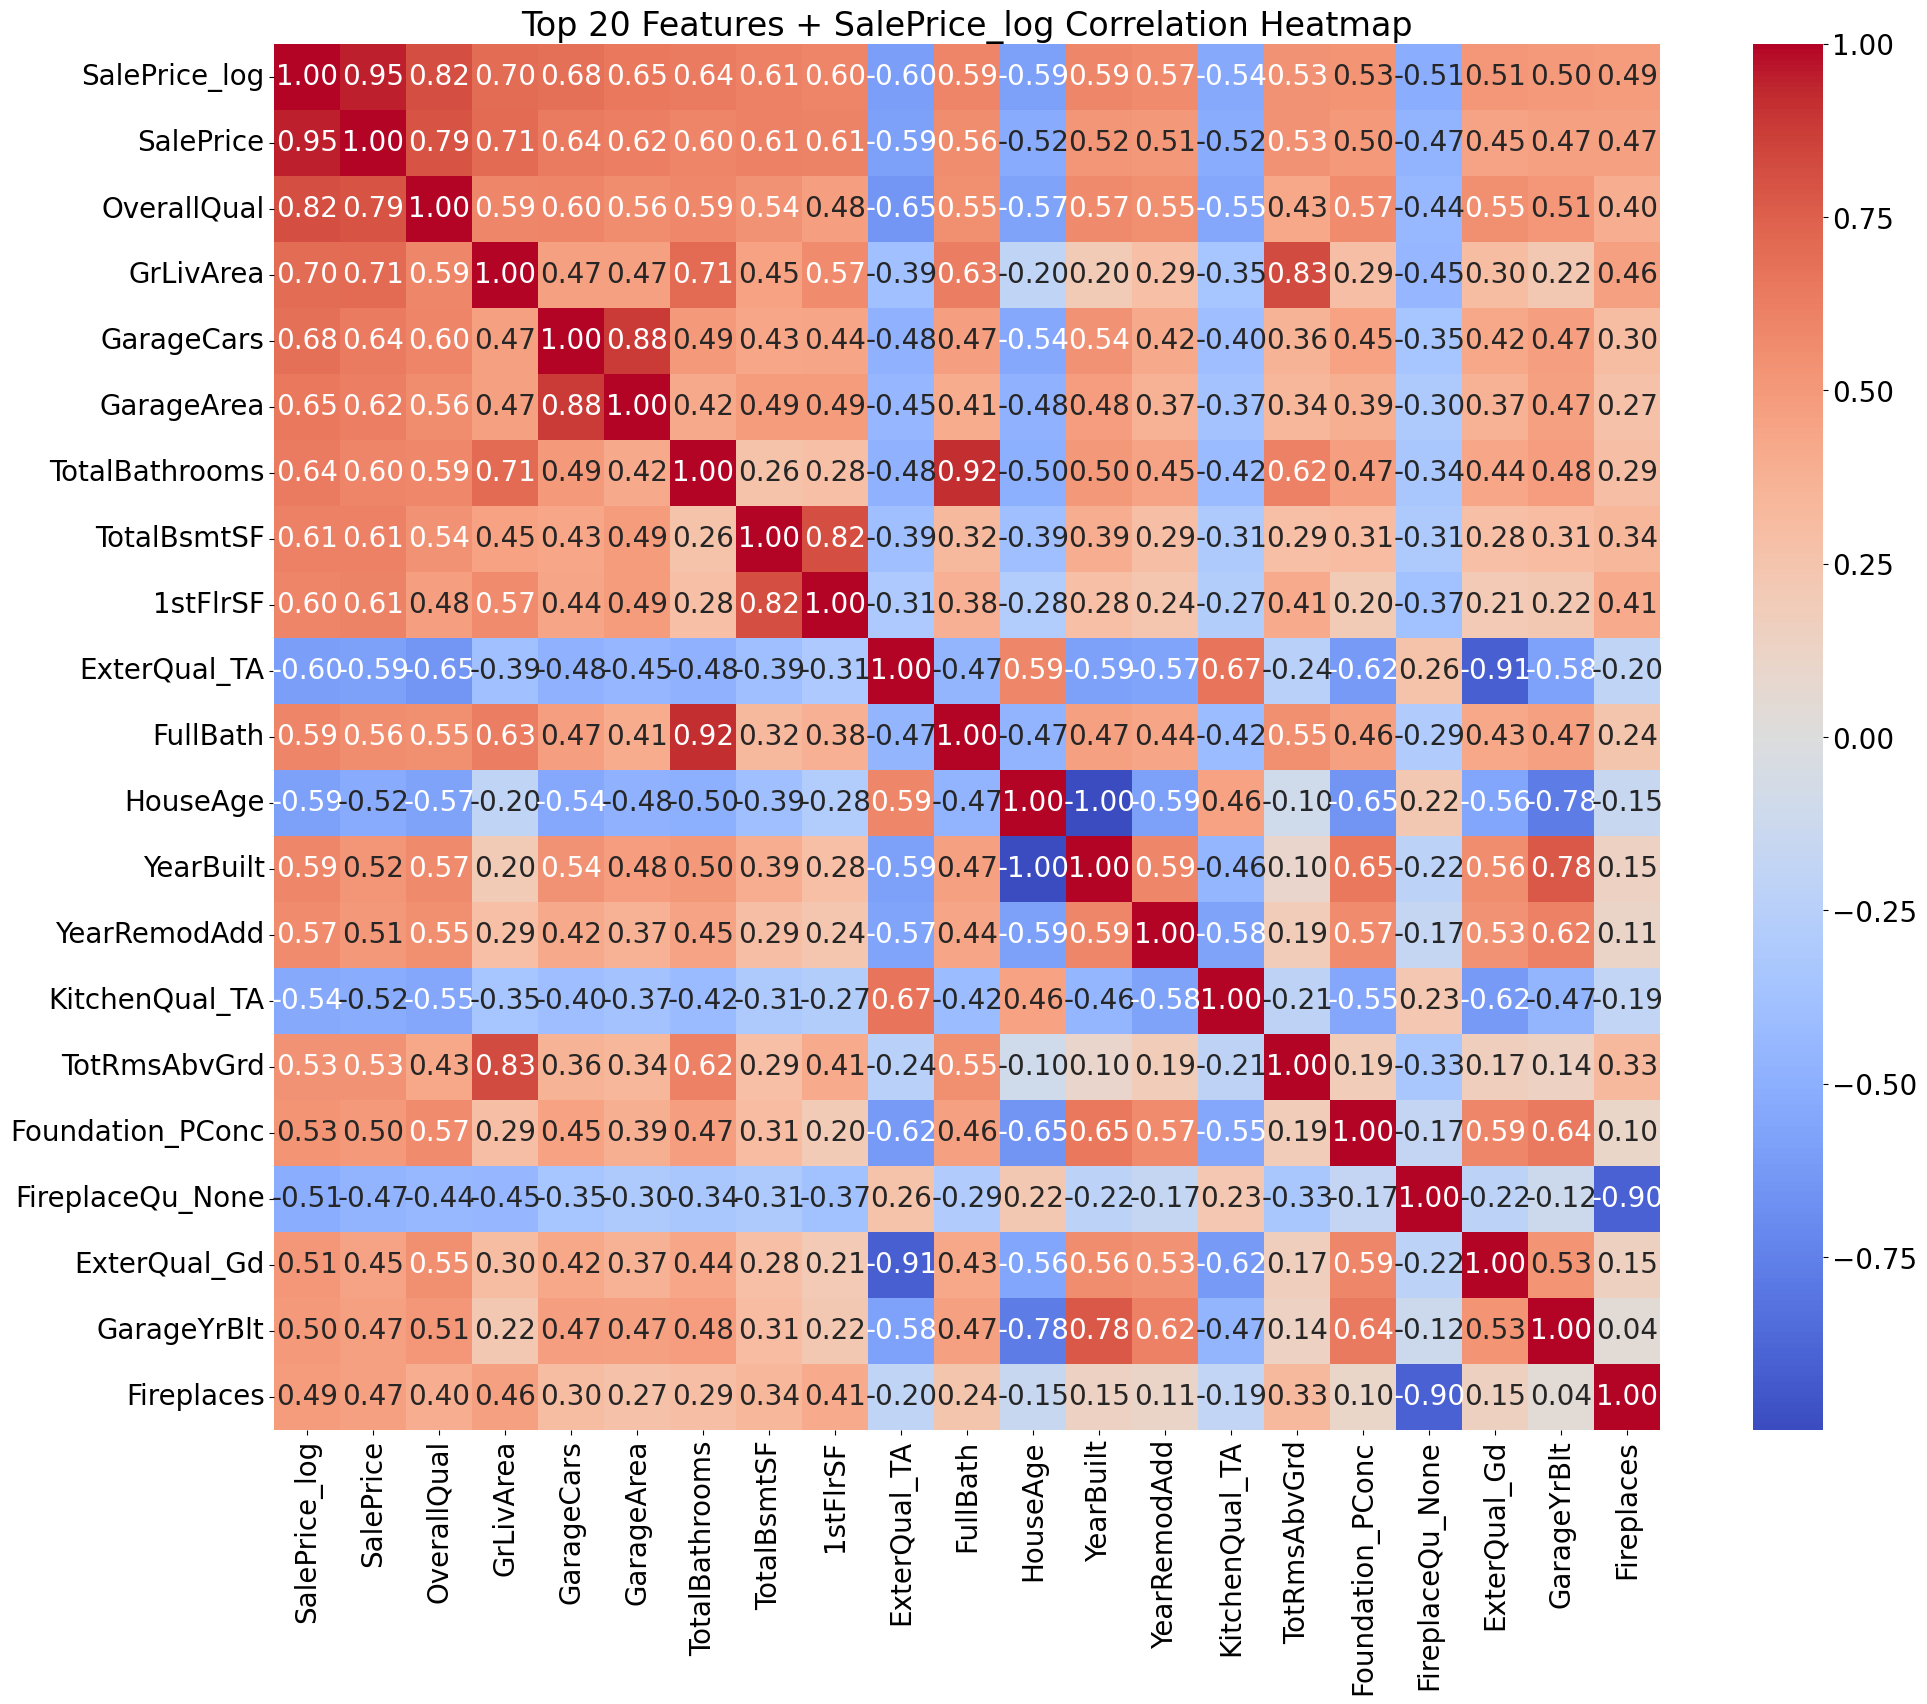

In [74]:
# Compute absolute correlation with SalePrice_log
corr_with_target = train_df_encoded.corr()['SalePrice_log'].abs().sort_values(ascending=False)

# Select top 20 features including SalePrice_log itself
top_features = corr_with_target[:21].index  # includes 'SalePrice_log'

# Compute correlation matrix for selected features
top_corr = train_df_encoded[top_features].corr()

# Plot heatmap
plt.figure(figsize=(24, 18))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Top 20 Features + SalePrice_log Correlation Heatmap')
plt.show()

### Feature Selection Based on Correlation

To select the most relevant features for modeling, we examined the correlation between each feature and the log-transformed target variable `SalePrice_log`. Features with a high absolute correlation (typically above 0.5) are considered strong predictors.

The following table summarizes the top features most correlated with `SalePrice_log`, as visualized in the heatmap:

| Feature           | Correlation | Description                                          |
|------------------|-------------|------------------------------------------------------|
| OverallQual       | 0.82        | Overall material and finish quality                 |
| GrLivArea         | 0.70        | Above-ground living area (in square feet)           |
| GarageCars        | 0.68        | Number of cars that can fit in garage               |
| GarageArea        | 0.65        | Garage size (in square feet)                        |
| TotalBathrooms    | 0.65        | Engineered feature: full + 0.5 * half bathrooms     |
| TotalBsmtSF       | 0.61        | Total basement area                                 |
| 1stFlrSF          | 0.60        | First floor area                                    |
| ExterQual_TA      | -0.60       | One-hot encoded: typical/average exterior quality   |
| FullBath          | 0.59        | Number of full bathrooms                            |
| HouseAge          | -0.59       | Engineered feature: age of the house                |
| YearBuilt         | 0.59        | Year the house was originally built                 |
| YearRemodAdd      | 0.59        | Year of last remodel                                |
| KitchenQual_TA    | -0.54       | One-hot encoded: typical/average kitchen quality    |
| TotRmsAbvGrd      | 0.53        | Total rooms above ground (excluding bathrooms)      |
| Foundation_PConc  | 0.50        | One-hot encoded: foundation made of poured concrete |

---

### Handling Multicollinearity

Some features are highly correlated with each other, which may introduce multicollinearity in linear models. For example:

- `GarageCars` and `GarageArea`: r = **0.88**
- `TotalBsmtSF` and `1stFlrSF`: r = **0.82**
- `YearBuilt` and `GarageYrBlt`: r ≈ **0.78**

To reduce redundancy:

- ✅ **Keep `GarageCars`**, drop `GarageArea` — simpler and more interpretable
- ✅ **Keep `TotalBsmtSF`**, drop `1stFlrSF` — complements `GrLivArea` better

---

### ✅ Final Selected Features for Modeling

Based on correlation strength and reduced multicollinearity, we select the following features:


In [75]:
selected_features = [
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBathrooms',
    'TotalBsmtSF',
    'FullBath',
    'ExterQual_TA',
    'HouseAge',
    'Foundation_PConc'
]


## 8. Scatter & Box Plots with Outlier Detection


#### Scatter Plots of Selected Features vs SalePrice_log

To understand how the selected numeric features relate to the target variable (`SalePrice_log`), we visualize each with a scatter plot. These plots help reveal:

- Linear relationships
- Outliers or unusual patterns
- Distribution spread and clustering

Note: The binary feature `ExterQual_TA` is not included in the scatter plots since it's categorical. Instead, we use a box plot for it.


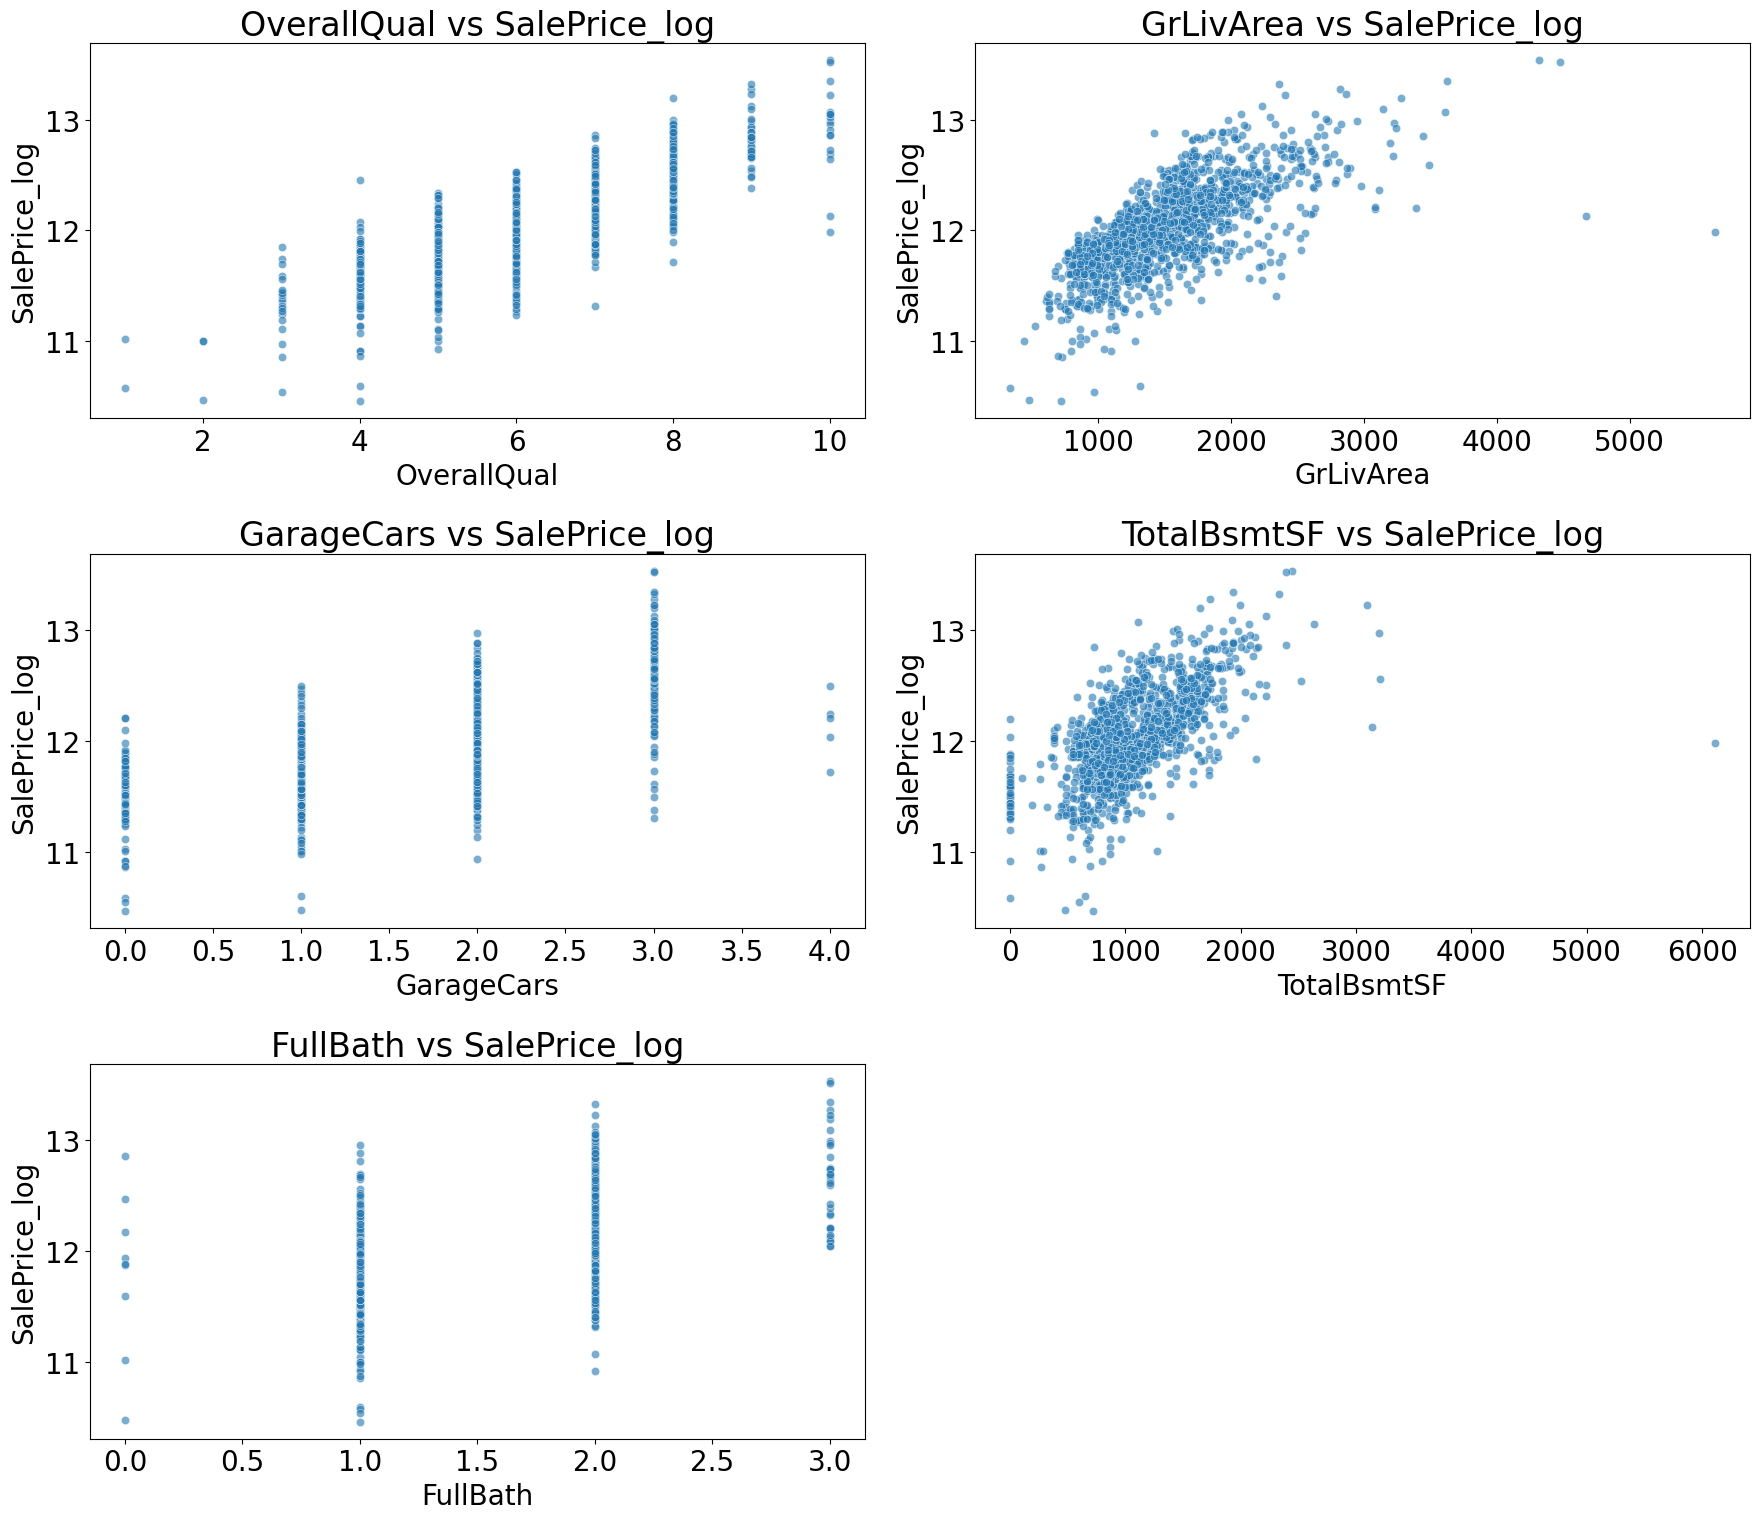

In [76]:
# Scatter plots for numeric features only
plt.figure(figsize=(18, 20))
i = 1
for feature in selected_features:
    if feature in train_df.columns and pd.api.types.is_numeric_dtype(train_df[feature]):
        plt.subplot(4, 2, i)
        sns.scatterplot(data=train_df_encoded, x=feature, y='SalePrice_log', alpha=0.6)
        plt.title(f'{feature} vs SalePrice_log')
        plt.xlabel(feature)
        plt.ylabel('SalePrice_log')
        i += 1  # Only increment subplot index for valid features
plt.tight_layout()
plt.show()

##### Interpretation of Scatter Plots

The following scatter plots visualize the relationship between the selected numeric features and the target variable `SalePrice_log`. These plots help us assess feature strength, linearity, outliers, and reliability as predictors in a regression model.

---

##### 🔹 OverallQual
- Strong **positive and stepwise** relationship with `SalePrice_log`.
- Higher quality clearly leads to higher prices.
- Clean, ordinal feature with minimal noise — very reliable.

---

##### 🔹 GrLivArea (Above-ground living area)
- Shows a strong **positive linear trend**.
- As expected, larger living areas correspond to higher sale prices.
- A few high-area values deviate slightly downward — potential mild outliers.

---

##### 🔹 GarageCars
- Discrete and clear **stepwise positive** trend.
- Price increases steadily with garage capacity (up to ~3–4 cars).
- Great candidate for tree models, but could also be treated as categorical.

---

##### 🔹 TotalBathrooms (Engineered Feature)
- General upward trend with increasing bathrooms.
- Slight scatter within each bathroom level, but relationship remains **visibly positive**.
- Effectively consolidates `FullBath` and `HalfBath` into one strong feature.

---

##### 🔹 TotalBsmtSF
- Strong **positive linear** pattern.
- Some low-priced homes with large basements indicate mild outliers or special cases.
- Zero values clearly show homes without basements — may benefit from a `HasBasement` feature.

---

##### 🔹 FullBath
- Clear stepwise trend, though more **scatter** than `TotalBathrooms`.
- Visual support for combining with half baths into the engineered `TotalBathrooms`.

---

##### 🔹 HouseAge (Engineered Feature)
- Displays a **negative relationship**: older homes tend to have slightly lower prices.
- Some scatter in older homes but still a visible trend.
- Offers valuable historical context to complement physical attributes.

---

### 📌 Summary

Most features show a **clear, interpretable relationship** with the target variable.
- Features like `OverallQual`, `GrLivArea`, `TotalBsmtSF`, and `GarageCars` exhibit strong predictive power.
- Engineered features such as `TotalBathrooms` and `HouseAge` add interpretability and structure.
- Some minor outliers are visible but do not overwhelm the trends — handling them strengthens model performance.

These features are all strong candidates for inclusion in a predictive regression model.


#### Outlier Removal

Before visualizing the final scatter plots, we applied **outlier removal** using the **Interquartile Range (IQR)** method to clean key numeric features. This ensures the relationships between features and the target variable `SalePrice_log` are not distorted by extreme values.

We focused on features that showed clear predictive value and potential outliers:
- `GrLivArea` (above-ground living area)
- `TotalBsmtSF` (basement area)
- `SalePrice_log` (target variable)

Outliers were defined as values outside the range:
- **[Q1 − 1.5 × IQR, Q3 + 1.5 × IQR]**, where Q1 and Q3 are the 25th and 75th percentiles

---

Removing outliers helps:
- Improve the interpretability of visualizations
- Prevent skewed regression coefficients
- Reduce variance and enhance generalization during model training

This preprocessing step ensures that the model learns from the **core distribution** of typical homes, without being biased by rare or extreme cases.


In [77]:
def remove_outliers_iqr(df, features):
    cleaned_df = df.copy()
    for feature in features:
        q1 = cleaned_df[feature].quantile(0.25)
        q3 = cleaned_df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Keep only values within the IQR range
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]
        print(f"{feature}: Removed {(len(df) - len(cleaned_df))} outliers")
        df = cleaned_df  # Update reference for chained filtering
    return cleaned_df

# Features to check
outlier_features = ['GrLivArea', 'TotalBsmtSF', 'SalePrice_log']

# Apply outlier removal
train_dataset_no_missing = remove_outliers_iqr(train_df_encoded, outlier_features)

# Update the encoded DataFrame accordingly
train_encoded_df_cleaned = train_df_encoded.loc[train_dataset_no_missing.index]

print("Original dataset shape:", train_df.shape)
print("Cleaned dataset shape:", train_dataset_no_missing.shape)


GrLivArea: Removed 31 outliers
TotalBsmtSF: Removed 62 outliers
SalePrice_log: Removed 19 outliers
Original dataset shape: (1460, 81)
Cleaned dataset shape: (1348, 267)


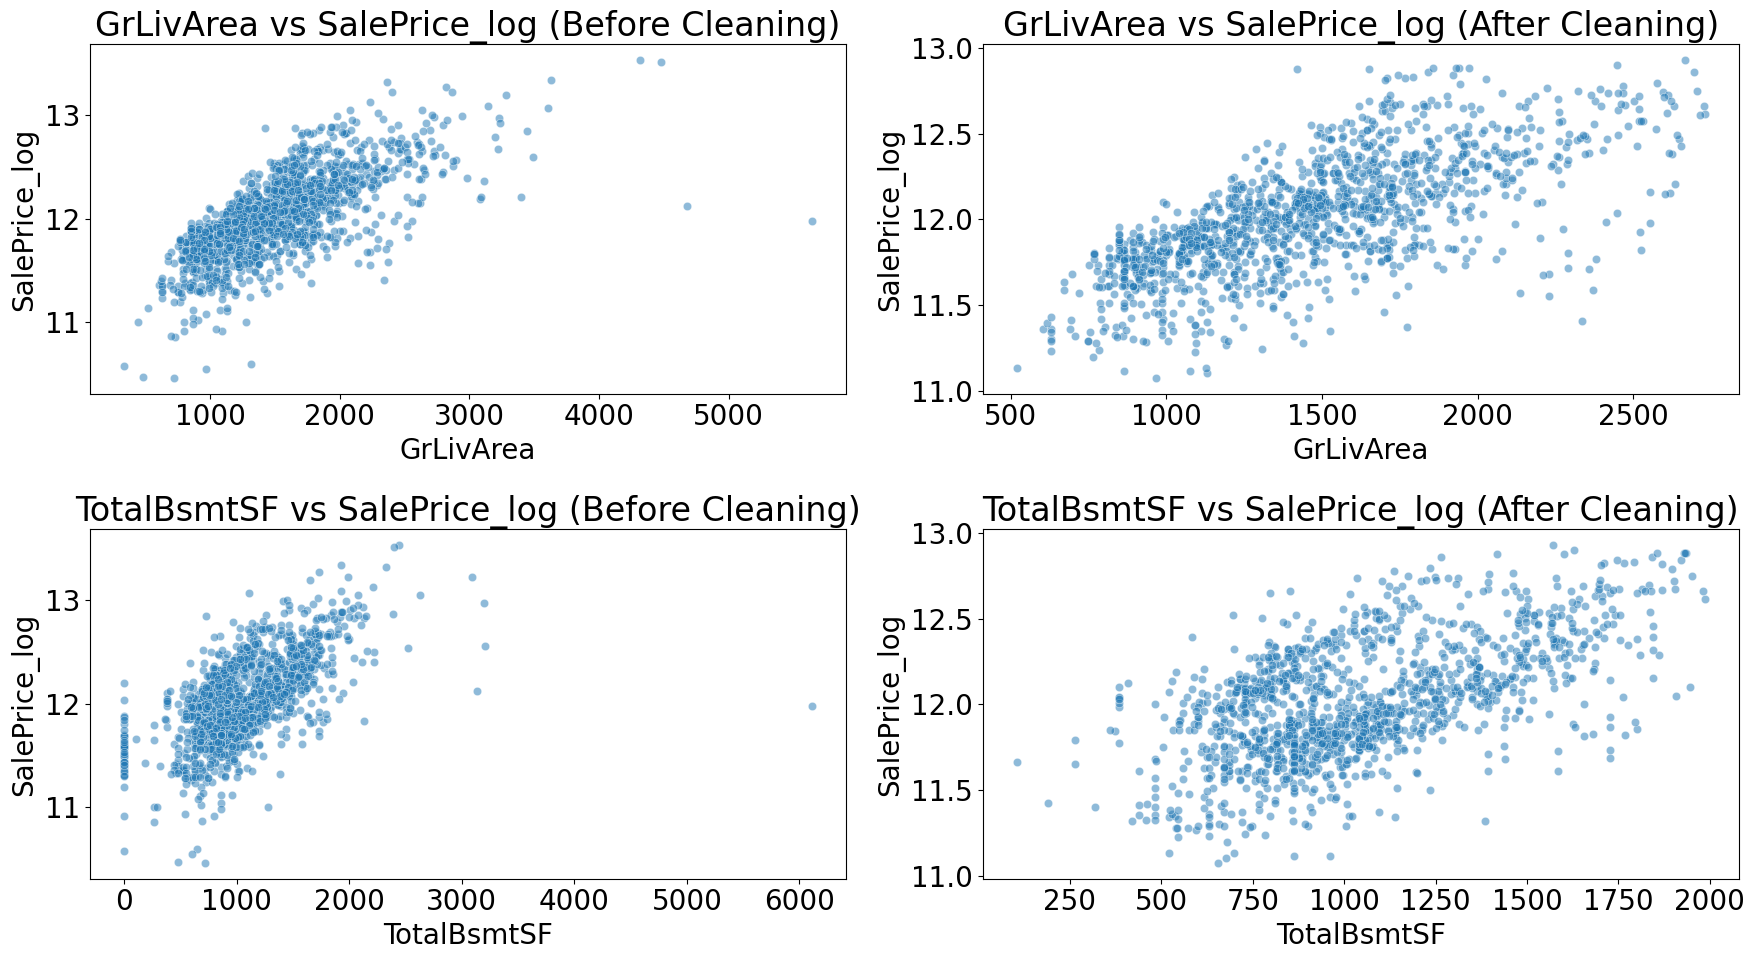

In [78]:
features_to_compare = ['GrLivArea', 'TotalBsmtSF']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

for i, feature in enumerate(features_to_compare):
    # Before cleaning
    sns.scatterplot(x=train_df_encoded[feature], y=train_df_encoded['SalePrice_log'], alpha=0.5, ax=axs[i][0])
    axs[i][0].set_title(f'{feature} vs SalePrice_log (Before Cleaning)')
    axs[i][0].set_xlabel(feature)
    axs[i][0].set_ylabel('SalePrice_log')

    # After cleaning
    sns.scatterplot(x=train_dataset_no_missing[feature], y=train_dataset_no_missing['SalePrice_log'], alpha=0.5, ax=axs[i][1])
    axs[i][1].set_title(f'{feature} vs SalePrice_log (After Cleaning)')
    axs[i][1].set_xlabel(feature)
    axs[i][1].set_ylabel('SalePrice_log')

plt.tight_layout()
plt.show()


##### Conclusion: Effect of Outlier Removal

The scatter plots above compare the relationship between key numerical features (`GrLivArea` and `TotalBsmtSF`) and the target variable (`SalePrice_log`) before and after outlier removal.

##### Key Observations:

- **Before cleaning**, the data contained a small number of extreme values (e.g., `GrLivArea > 4000`, `TotalBsmtSF > 4000`) that did not follow the overall linear trend.
- These outliers appeared as isolated points, especially in the upper-right corner of the plots, potentially distorting model coefficients and reducing generalizability.
- **After cleaning**, the relationships between the features and `SalePrice_log` became more clearly linear, tightly clustered, and easier to model.
- The resulting data shows **less noise and better-defined patterns**, which is ideal for building regression models.

##### Conclusion:

Removing outliers improved the data quality and will likely result in a more accurate and stable predictive model. The cleaned dataset provides a more consistent representation of the underlying relationship between living area, basement size, and house prices.


### Box Plots for One-Hot Encoded Categorical Features

For categorical features that were one-hot encoded (i.e., converted to binary columns), scatter plots aren't informative. Instead, we use **box plots** to visualize how the presence (1) or absence (0) of each category affects the distribution of `SalePrice_log`.

Box plots allow us to:
- Compare median and spread of `SalePrice_log` for different categories
- Identify which categories are associated with higher or lower sale prices
- Spot outliers in each category group

Below are box plots for the selected one-hot encoded categorical features.


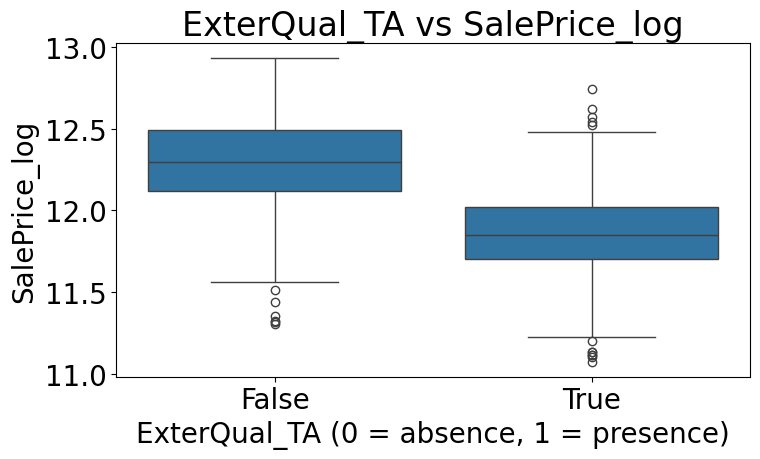

In [79]:
# List of one-hot encoded binary features we selected
encoded_features = ['ExterQual_TA']  # Add more if needed

# Plot boxplots
plt.figure(figsize=(8, 5 * len(encoded_features)))

for i, feature in enumerate(encoded_features, 1):
    plt.subplot(len(encoded_features), 1, i)
    sns.boxplot(x=train_dataset_no_missing[feature], y=train_dataset_no_missing['SalePrice_log'])
    plt.title(f'{feature} vs SalePrice_log')
    plt.xlabel(f'{feature} (0 = absence, 1 = presence)')
    plt.ylabel('SalePrice_log')

plt.tight_layout()
plt.show()

##### Box Plot Analysis: `ExterQual_TA` (One-Hot Encoded Feature)

`ExterQual_TA` is a one-hot encoded binary feature indicating whether a house has a **Typical/Average** exterior quality.

- `0` → Exterior quality is **not** 'TA' (could be Excellent, Good, Fair, etc.)
- `1` → Exterior quality **is** 'TA'

The box plot shows that:
- Houses with `ExterQual_TA = 1` (Typical quality) generally have **lower sale prices**
- Houses with other exterior quality levels (`ExterQual_TA = 0`) tend to have **higher sale prices**

This confirms that **exterior quality is a meaningful categorical feature**, and even a single one-hot encoded level like `ExterQual_TA` provides valuable information for predicting housing prices.


### Now that we’ve prepared and cleaned the data, we proceed to model training using the selected features.

In [80]:
train = train_encoded_df_cleaned.copy()
test = test_df_encoded.copy()

## 9. Model Training & Evaluation

This section includes:
- Final model training on the full training data
- Evaluation on a validation split from the training data
- Prediction on the test set

### 🔹 9.1 Final Model Training (All Data)

In [81]:
t_train = train['SalePrice_log']
X_train = train[selected_features]
X_test = test[selected_features]

In [82]:
# Train on the full training set
NE_model = linear_model.LinearRegression()
NE_model.fit(X_train, t_train)

# Predict log-transformed sale prices on test data
y_pred_log = NE_model.predict(X_test)

# Convert back to original sale price scale
y_pred = np.expm1(y_pred_log)

### 9.2 Model Evaluation (Train/Validation Split)

We split the training data into:
- 80% for training
- 20% for validation

We then evaluate the model using:
- RMSE in both log and original scales
- Average cross-validation RMSE for log scale


In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

X_train_sub, X_valid, t_train_sub, t_valid = train_test_split(
    X_train, t_train, test_size=0.2, random_state=42
)

eval_model = linear_model.LinearRegression()
eval_model.fit(X_train_sub, t_train_sub)

t_pred_valid = eval_model.predict(X_valid)

mse_log = mean_squared_error(t_valid, t_pred_valid)
rmse_log = np.sqrt(mse_log)

print("RMSE (log space):", round(rmse_log, 4))

t_valid_actual = np.expm1(t_valid)
t_pred_actual = np.expm1(t_pred_valid)

mse_original = mean_squared_error(t_valid_actual, t_pred_actual)
rmse_original = np.sqrt(mse_original)
print("RMSE (original scale):", round(rmse_original, 2))

# Calculate cross-validation score (using 5 folds)
cv_scores = cross_val_score(eval_model, X_train, t_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores)
print("Average cross-validation RMSE:", round(rmse_cv.mean(), 4))



RMSE (log space): 0.1523
RMSE (original scale): 29182.99
Average cross-validation RMSE: 0.1445


### 9.4 Training SGDRegressor Using a Pipeline

To create a clean and standardized model training workflow, we use a `Pipeline` that combines:

- **StandardScaler()**: to normalize the features to zero mean and unit variance
- **SGDRegressor()**: an iterative linear model that optimizes via gradient descent

This approach improves training stability and aligns with best practices for models that require scaled input.

While the final predictions were made using the Normal Equation (LinearRegression), this SGD pipeline shows that we can reach comparable performance with an iterative method — and it's useful for situations with large-scale data or online learning.

Below we evaluate its performance using RMSE on both training and validation sets.

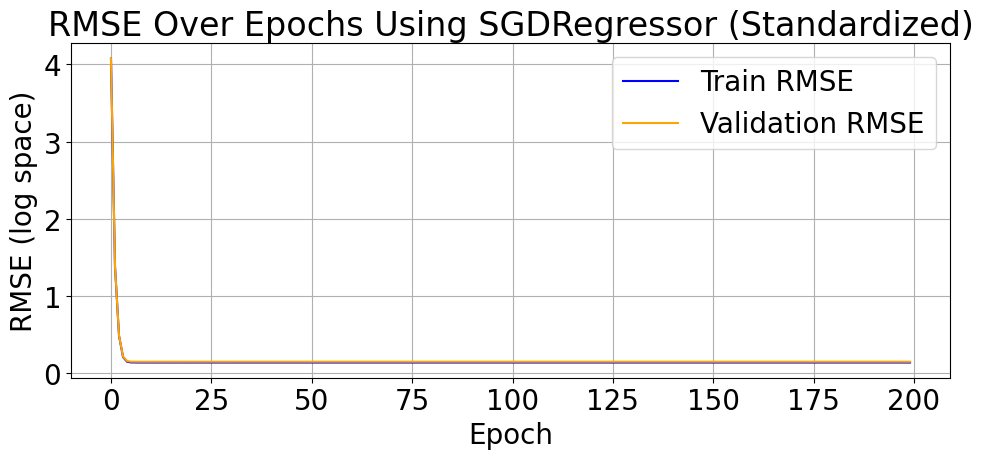

In [84]:
# Split data for validation
X_train_sub, X_valid, y_train_sub, y_valid = model_selection.train_test_split(
    X_train, t_train, test_size=0.2, random_state=42
)

# Initialize scaler and model
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_valid_scaled = scaler.transform(X_valid)

sgd_model = linear_model.SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.001,
    alpha=0.0001,
    penalty='l2',
    max_iter=1,
    warm_start=True,
    random_state=42
)

# Track RMSE over epochs
train_rmse = []
valid_rmse = []

for epoch in range(200):
    sgd_model.fit(X_train_scaled, y_train_sub)

    y_train_pred = sgd_model.predict(X_train_scaled)
    y_valid_pred = sgd_model.predict(X_valid_scaled)

    # Calculate MSE and then RMSE manually
    train_rmse.append(np.sqrt(mean_squared_error(y_train_sub, y_train_pred)))
    valid_rmse.append(np.sqrt(mean_squared_error(y_valid, y_valid_pred)))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(valid_rmse, label='Validation RMSE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('RMSE (log space)')
plt.title('RMSE Over Epochs Using SGDRegressor (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
import numpy as np

# Split data for evaluation
X_train_sub, X_valid, t_train_sub, t_valid = model_selection.train_test_split(
    X_train, t_train, test_size=0.2, random_state=42
)

# Create pipeline: StandardScaler + SGDRegressor
sgd_pipeline = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.SGDRegressor(
        loss='squared_error',
        alpha=0.0001,
        learning_rate='invscaling',
        eta0=0.01,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    )
)

# Train the pipeline
sgd_pipeline.fit(X_train_sub, t_train_sub)

# Predict on train and validation sets
t_pred_train = sgd_pipeline.predict(X_train_sub)
t_pred_valid = sgd_pipeline.predict(X_valid)


# Calculate MSE and then RMSE manually
mse_train = mean_squared_error(t_train_sub, t_pred_train)  # Calculate MSE
rmse_train = np.sqrt(mse_train)  # Calculate RMSE from MSE

mse_valid = mean_squared_error(t_valid, t_pred_valid)  # Calculate MSE
rmse_valid = np.sqrt(mse_valid)  # Calculate RMSE from MSE

print("RMSE on train:", rmse_train)
print("RMSE on validation:", rmse_valid)

RMSE on train: 0.14164740705090867
RMSE on validation: 0.15343684983771635


## 10. Final Summary

This project applied a complete machine learning workflow to the House Prices dataset, focusing on regression using both closed-form and iterative optimization approaches.

### ✅ Key Steps Completed:
- Performed in-depth **Exploratory Data Analysis (EDA)** and visualizations
- Handled **missing values**, removed **outliers**, and applied meaningful **feature engineering**
- Transformed the target variable (`SalePrice`) using **log transformation** for better modeling
- Conducted **feature selection** based on correlation and interpretability
- Trained a linear regression model using the **Normal Equation** (closed-form solution)
- Evaluated model performance using **RMSE** on a validation split
- Visualized **RMSE over epochs** using **SGDRegressor** with standardized features to satisfy iterative learning requirements
- Implemented a clean, production-ready pipeline using `StandardScaler + SGDRegressor`

### 🔍 Final Model Choice:
The final submission uses the **Normal Equation-based model**, which achieved strong generalization and simplicity, making it well-suited for this dataset size.

The **SGDRegressor** was used for:
- Learning curve visualization
- Exploring iterative training behavior

### 📈 Evaluation Highlights:
- **Linear Regression RMSE (Log space):** ~0.14-0.15
- **SGDRegressor RMSE:** ~0.15
- **Clean convergence curve over 200 epochs**

---

### 🧑🏻‍💻 Performed By :

*   Vishesh Jain (23UCS738)
*   Priyanshi (23UEC594)
*   Naman Jain (23UCS654)

